In [80]:
library(ISLR)
library(class)
library(MASS)

In [3]:
head(Weekly)

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down


In [4]:
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

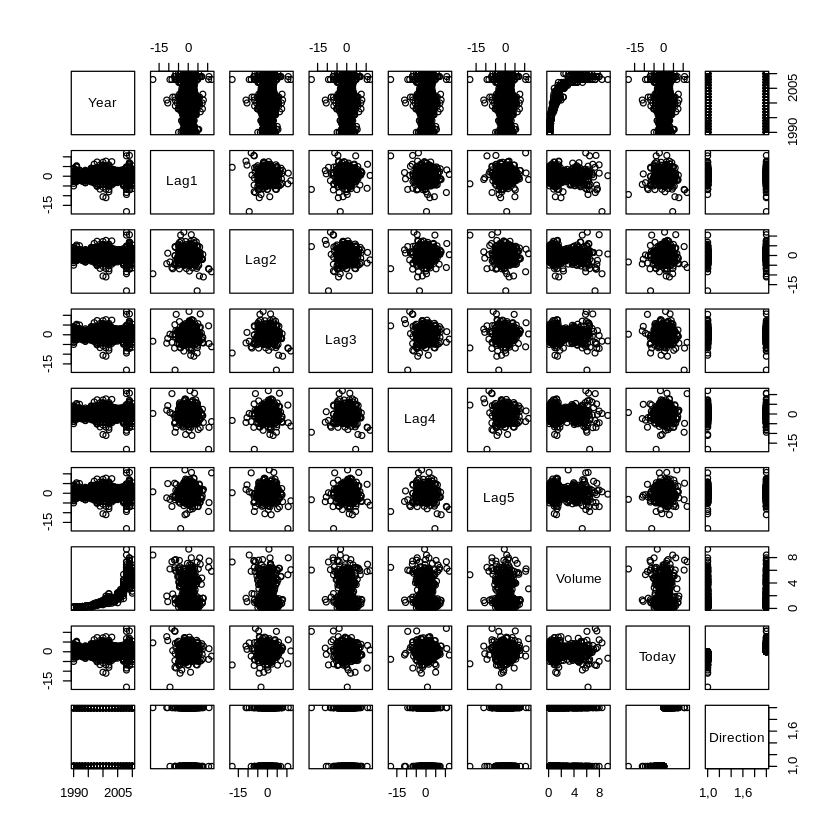

In [7]:
plot(Weekly)

### logistic regression on the full dataset

In [8]:
glm.fits = glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Weekly, family="binomial")

In [9]:
summary(glm.fits)

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = "binomial", data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1,6949  -1,2565   0,9913   1,0849   1,4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0,26686    0,08593   3,106   0,0019 **
Lag1        -0,04127    0,02641  -1,563   0,1181   
Lag2         0,05844    0,02686   2,175   0,0296 * 
Lag3        -0,01606    0,02666  -0,602   0,5469   
Lag4        -0,02779    0,02646  -1,050   0,2937   
Lag5        -0,01447    0,02638  -0,549   0,5833   
Volume      -0,02274    0,03690  -0,616   0,5377   
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496,2  on 1088  degrees of freedom
Residual deviance: 1486,4  on 1082  degrees of freedom
AIC: 1500,4

Number of Fisher Scoring iterations: 4


In [13]:
glm.probs = predict(glm.fits)
glm.pred = rep("Down", length(glm.probs))
glm.pred[glm.probs > 0.5] = "Up"

In [15]:
cm = table(glm.pred, Weekly$Direction)
cm

        
glm.pred Down  Up
    Down  465 563
    Up     19  42

In [16]:
# accuracy
mean(glm.pred == Weekly$Direction)

[1] 0,4655647

In [18]:
TP = cm[2, 2]
TN = cm[1, 1]
FP = cm[2, 1]
FN = cm[1, 2]
(TP + TN) / (TP + TN + FP + FN)

[1] 0,4655647

In [20]:
# precision
TP / (TP + FP)

[1] 0,6885246

In [21]:
# recall 
TP / (TP + FN)

[1] 0,06942149

In [22]:
# F1 
TP / (TP + (FP + FN) / 2)

[1] 0,1261261

### increasing recall

In [30]:
# increasing the recall
glm.pred = rep("Down", length(glm.probs))
glm.pred[glm.probs > 0.15] = "Up"

In [31]:
# recall 
cm = table(glm.pred, Weekly$Direction)
cm

        
glm.pred Down  Up
    Down  172 172
    Up    312 433

In [32]:
# accuracy 
TP = cm[2, 2]
TN = cm[1, 1]
FP = cm[2, 1]
FN = cm[1, 2]
mean(glm.pred == Weekly$Direction)

[1] 0,5555556

In [33]:
# precision 
TP / (TP + FP)

[1] 0,5812081

In [34]:
# recall 
TP / (TP + FN)

[1] 0,7157025

### using training & test set and Lag2 as the only predictior

In [59]:
train = Weekly$Year >= 1990 & Weekly$Year <= 2008
test = Weekly$Year >= 2009
train.X = Weekly[train, ]
train.y = Weekly$Direction[train]
test.X = Weekly[!train, ]
test.y = Weekly$Direction[!train]

In [76]:
glm.fits = glm(Direction~Lag2, data=Weekly, family="binomial", subset=train)
glm.probs = predict(glm.fits, test.X)
glm.pred = rep("Down", length(test.y))
glm.pred[glm.probs > 0.5] = "Up"

In [77]:
cm = table(glm.pred, test.y)
cm

        test.y
glm.pred Down Up
    Down   41 56
    Up      2  5

In [78]:
# accuracy
mean(glm.pred == test.y)

[1] 0,4423077

### using LDA

In [99]:
lda.fit = lda(Direction~Lag2, data=Weekly, subset=train)
lda.pred = predict(lda.fit, test.X)
table(lda.pred$class, test.y)

      test.y
       Down Up
  Down    9  5
  Up     34 56

In [100]:
# accuracy
mean(lda.pred$class == test.y)

[1] 0,625

### using QDA

In [105]:
qda.fit = qda(Direction~Lag2, data=Weekly, subset=train)
qda.pred = predict(qda.fit, test.X)
table(qda.pred$class, test.y)

      test.y
       Down Up
  Down    0  0
  Up     43 61

In [111]:
# accuracy
mean(qda.pred$class == test.y)

[1] 0,5865385

### using KNN

In [160]:
scaled.train.X = scale(train.X[, 3])
scaled.test.X = scale(test.X[, 3])
knn.pred = knn(scaled.train.X, scaled.test.X, train.y, k=1)
table(knn.pred, test.y)

        test.y
knn.pred Down Up
    Down   15 25
    Up     28 36

In [161]:
# accuracy
mean(knn.pred == test.y)

[1] 0,4903846

In [162]:
knn.pred = knn(scaled.train.X, scaled.test.X, train.y, k=1)
table(knn.pred, test.y)

        test.y
knn.pred Down Up
    Down   15 25
    Up     28 36

In [163]:
mean(knn.pred == test.y)

[1] 0,4903846